In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
#Load datasets
movies_data = pd.read_csv('movies.dat',sep='::',names=["MovieID","Title","Genres"],engine = 'python', encoding='latin1')
movies_data.dropna(inplace=True)
movies_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_data = pd.read_csv('ratings.dat',sep='::',names=["UserID","MovieID","Rating","Timestamp"],engine = 'python', encoding='latin1')
ratings_data.dropna(inplace=True)
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
users_data = pd.read_csv('users.dat',sep='::',names=["UserID","Gender","Age","Occupation","Zip-code"],engine = 'python', encoding='latin1')
users_data.dropna(inplace=True)
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
#Merge datasets
merged_ratings_movies = movies_data.merge(ratings_data, on='MovieID', how='inner')
merged_data = merged_ratings_movies.merge(users_data, on='UserID', how='inner')
merged_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [6]:
#Data Cleaning
cleaned_data = merged_data.drop(columns=['Title', 'Genres', 'UserID', 'Timestamp', 'Zip-code'])
cleaned_data.head()

,MovieID,Rating,Gender,Age,Occupation
0,1,5,F,1,10
1,48,5,F,1,10
2,150,5,F,1,10
3,260,4,F,1,10
4,527,5,F,1,10


In [7]:
#Converting 'Gender' column to numerical values
gender_mapping = {'M': 1, 'F': 0}
cleaned_data['Gender'] = cleaned_data['Gender'].map(gender_mapping)
cleaned_data.head()

,MovieID,Rating,Gender,Age,Occupation
0,1,5,0,1,10
1,48,5,0,1,10
2,150,5,0,1,10
3,260,4,0,1,10
4,527,5,0,1,10


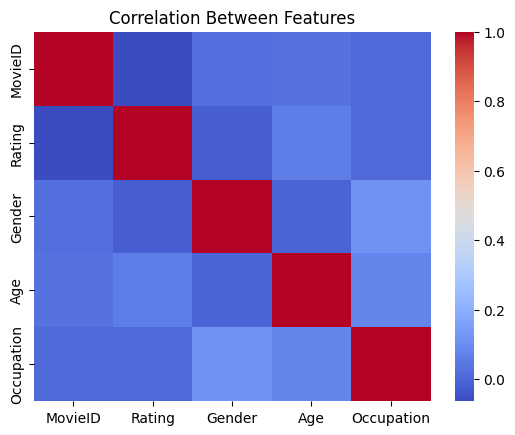

In [8]:
#Exploratory Data Analysis
sns.heatmap(cleaned_data.corr(), cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

In [9]:
#User age distribution
cleaned_data['Age'].value_counts()

Age
25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: count, dtype: int64

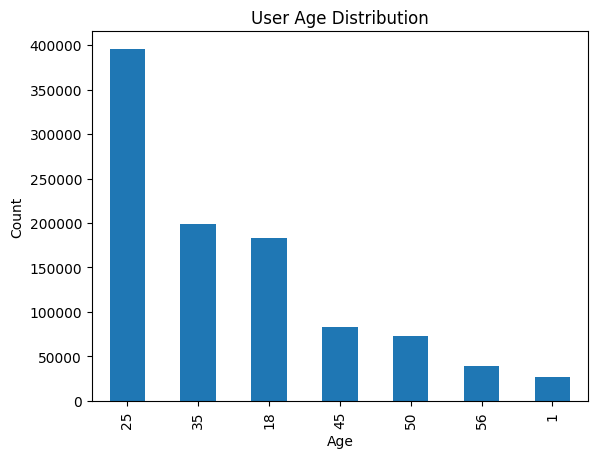

In [10]:
#Graphical representation
cleaned_data['Age'].value_counts().plot(kind='bar')
plt.title("User Age Distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [11]:
#Seperating Dependent and Independent variables
x = cleaned_data[["MovieID", "Age", "Occupation"]]
y = cleaned_data['Rating']

In [12]:
#train test split method
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

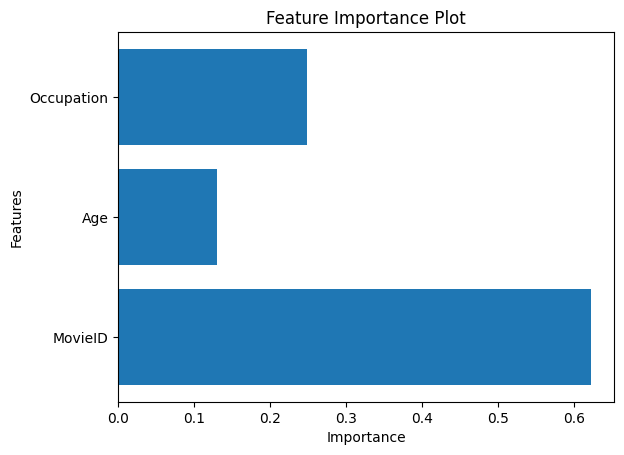

In [13]:
#Feature Importance Visualization
feature_importances = regressor.feature_importances_
feature_names = x.columns

plt.barh(feature_names, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()

In [14]:
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1.19
Mean Absolute Error: 0.85
R-squared: 0.05


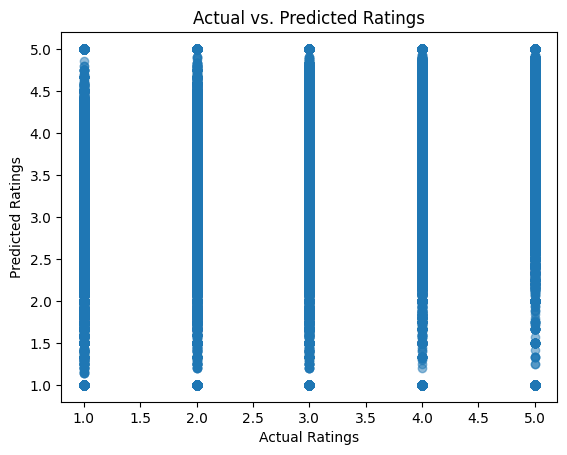

In [15]:
#Visualization of Actual vs. Predicted Ratings
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings")
plt.show()